# Social Network Segmentation Analysis

In this exercise, we will try to identify different groups of teenagers based on their personal preferences using an unsupervised learning model.  
  
Start by importing your libraries, loading the dataset and exploring its variables.  
What features do you find? Do they have the correct datatypes?

In [1]:
# Import your libraries here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

from yellowbrick.cluster import KElbowVisualizer

In [2]:
plt.style.use('ggplot')

In [3]:
# Load the dataset and explore its variables

segmentation = pd.read_csv(r'/Users/diegoperezo97/Documents/Ironhack – Data Analytics Bootcamp/Module 3/Week 8/Day 2/lab-unsupervised-learning-deepdive/snsdata.csv')
segmentation.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


## 1. Data Wrangling

If you found in the last step that there are variables that need to be dealt with before we can start our analysis, please do it. Comment your code and take us through the steps of your thinking.  

Consider the some of these aspects:  
* Wrong data types
* Null values
* Consistency in categorical data

In [4]:
#Your code here:

len(segmentation)

30000

In [5]:
#Your code here:

segmentation.dtypes

gradyear          int64
gender           object
age             float64
friends           int64
basketball        int64
football          int64
soccer            int64
softball          int64
volleyball        int64
swimming          int64
cheerleading      int64
baseball          int64
tennis            int64
sports            int64
cute              int64
sex               int64
sexy              int64
hot               int64
kissed            int64
dance             int64
band              int64
marching          int64
music             int64
rock              int64
god               int64
church            int64
jesus             int64
bible             int64
hair              int64
dress             int64
blonde            int64
mall              int64
shopping          int64
clothes           int64
hollister         int64
abercrombie       int64
die               int64
death             int64
drunk             int64
drugs             int64
dtype: object

In [6]:
#Your code here:

segmentation.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [7]:
#Your code here:

segmentation.isnull().mean()

gradyear        0.000000
gender          0.090800
age             0.169533
friends         0.000000
basketball      0.000000
football        0.000000
soccer          0.000000
softball        0.000000
volleyball      0.000000
swimming        0.000000
cheerleading    0.000000
baseball        0.000000
tennis          0.000000
sports          0.000000
cute            0.000000
sex             0.000000
sexy            0.000000
hot             0.000000
kissed          0.000000
dance           0.000000
band            0.000000
marching        0.000000
music           0.000000
rock            0.000000
god             0.000000
church          0.000000
jesus           0.000000
bible           0.000000
hair            0.000000
dress           0.000000
blonde          0.000000
mall            0.000000
shopping        0.000000
clothes         0.000000
hollister       0.000000
abercrombie     0.000000
die             0.000000
death           0.000000
drunk           0.000000
drugs           0.000000


In [8]:
#Your code here:

segmentation.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,...,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [9]:
segmentation.corr()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
gradyear,1.000000,-0.108653,0.066851,0.072767,0.025213,0.058298,0.046433,0.061452,0.038754,0.042809,...,0.010269,0.074370,0.042722,0.039899,0.060011,0.055192,0.014776,0.001536,-0.021476,0.008931
age,-0.108653,1.000000,-0.014507,-0.020402,-0.016419,-0.008782,-0.016963,-0.015925,-0.004031,-0.019347,...,-0.002186,-0.020503,-0.027810,-0.021595,-0.007546,-0.011658,0.003557,-0.000724,0.000650,-0.001582
friends,0.066851,-0.014507,1.000000,0.053052,0.031738,0.027402,0.055935,0.046853,0.029147,0.054851,...,0.008502,0.066716,0.084627,0.026906,0.056240,0.057502,0.010432,0.026358,0.017036,-0.006960
basketball,0.072767,-0.020402,0.053052,1.000000,0.177333,0.071375,0.123884,0.136199,0.025810,0.041059,...,0.018204,0.069477,0.073422,0.076253,0.036633,0.033880,0.020331,0.017815,0.021744,0.031330
football,0.025213,-0.016419,0.031738,0.177333,1.000000,0.063986,0.046312,0.058534,0.035534,0.088658,...,0.033070,0.065207,0.056572,0.070793,0.063667,0.041708,0.023424,0.018757,0.038740,0.031675
soccer,0.058298,-0.008782,0.027402,0.071375,0.063986,1.000000,0.012366,0.029045,0.039001,0.014794,...,0.015134,0.022723,0.054580,0.022189,0.029353,0.022757,0.008942,0.004957,0.009390,0.014844
softball,0.046433,-0.016963,0.055935,0.123884,0.046312,0.012366,1.000000,0.115052,0.020749,0.026927,...,0.006857,0.034093,0.050446,0.047182,0.024057,0.020079,0.012750,0.021312,0.008083,0.015096
volleyball,0.061452,-0.015925,0.046853,0.136199,0.058534,0.029045,0.115052,1.000000,0.043515,0.023508,...,0.008077,0.035103,0.077030,0.030456,0.041156,0.043096,0.003543,0.014249,0.004995,0.014548
swimming,0.038754,-0.004031,0.029147,0.025810,0.035534,0.039001,0.020749,0.043515,1.000000,0.023826,...,0.021183,0.045530,0.118624,0.071109,0.048956,0.056899,0.021548,0.017627,0.027838,0.032532
cheerleading,0.042809,-0.019347,0.054851,0.041059,0.088658,0.014794,0.026927,0.023508,0.023826,1.000000,...,0.020405,0.060240,0.110205,0.054158,0.088120,0.076811,0.009243,0.009580,0.016172,0.023010


## 2. Data Visualization

Now that the data is more or less fixed, plot some charts to understand better how it is composed:  
* Check distribution of variables - do we have outliers? What should we do with them?
* Understand which features are correlated - do they represent the same? Which ones should we keep?
* When we compare two variables, is it possible to see groups in the data?
* Given the dimension of the dataset, would it be useful to perform dimension reduction in some variables? Which ones would you group?

Comment your ideas based on the visualizations you made and other data exploration. What will be your next steps before modeling?

In [10]:
segmentation.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


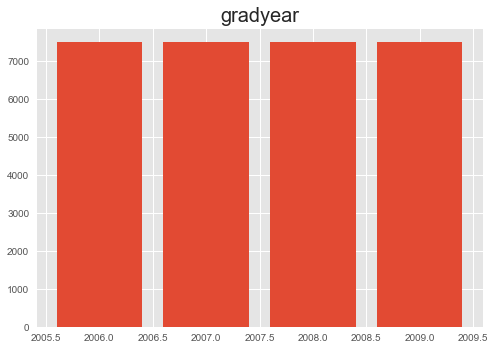

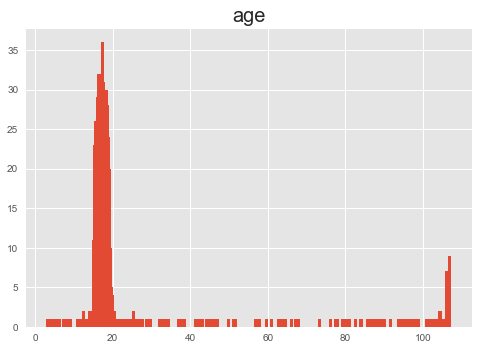

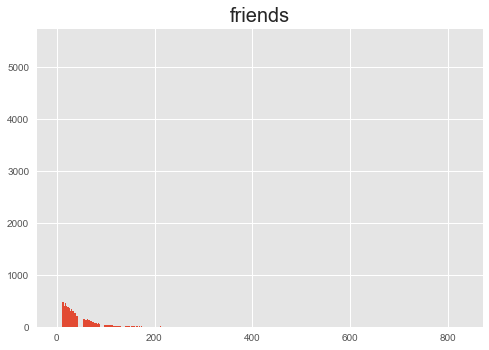

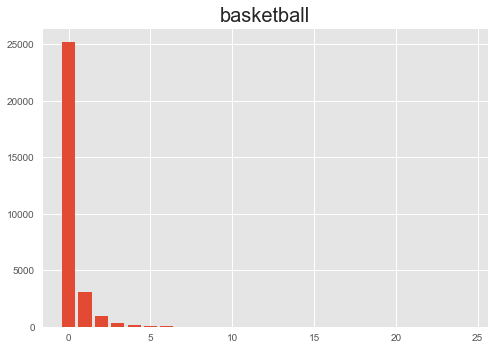

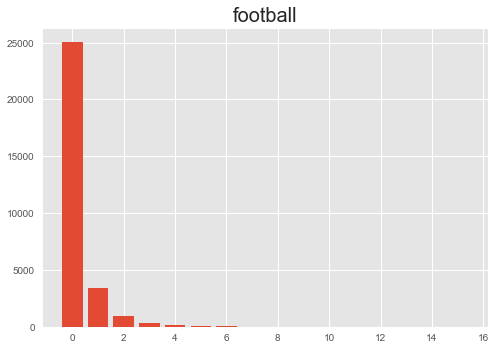

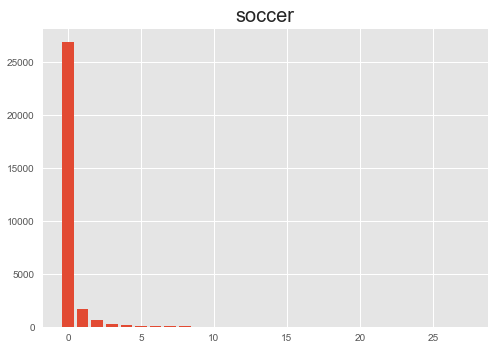

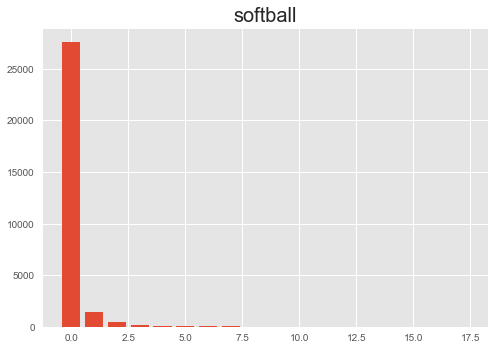

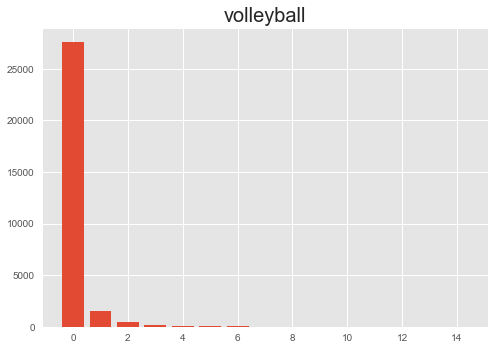

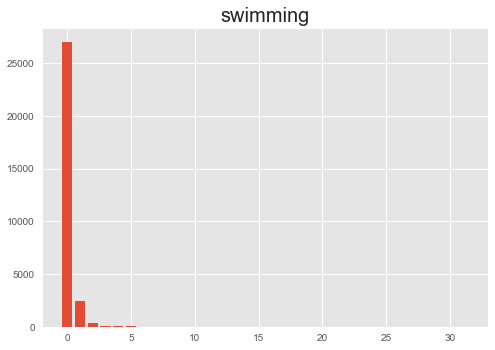

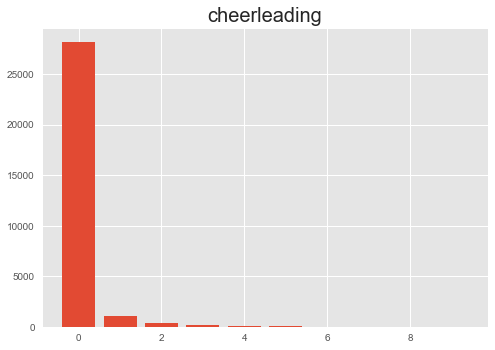

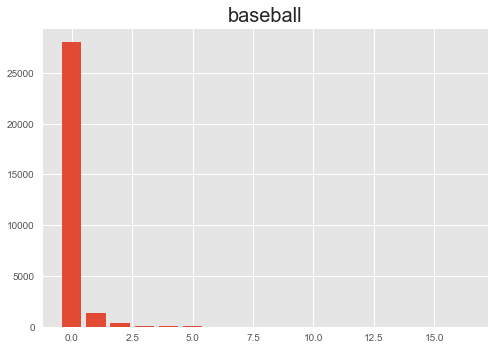

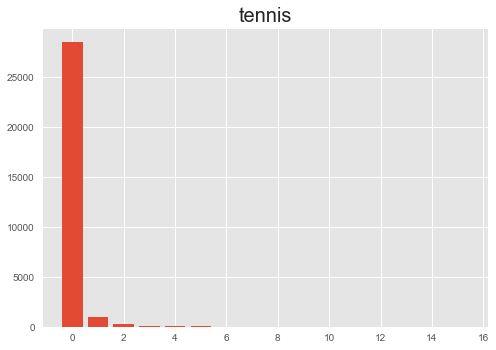

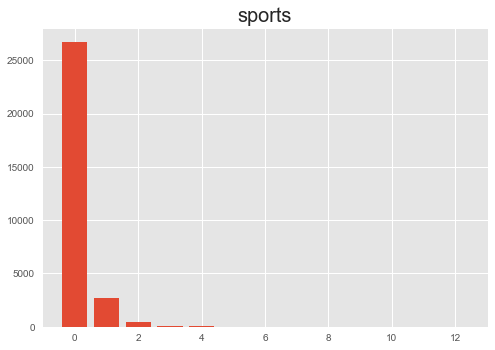

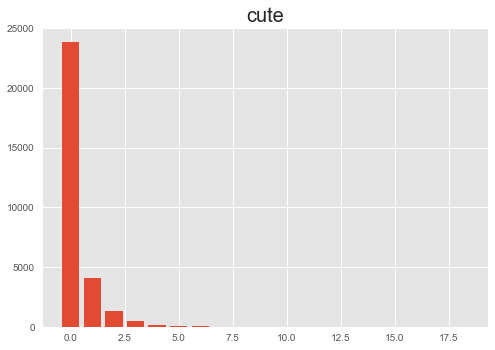

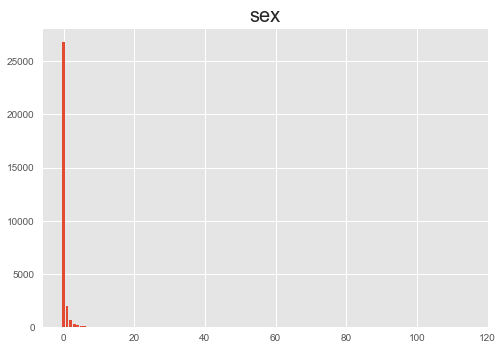

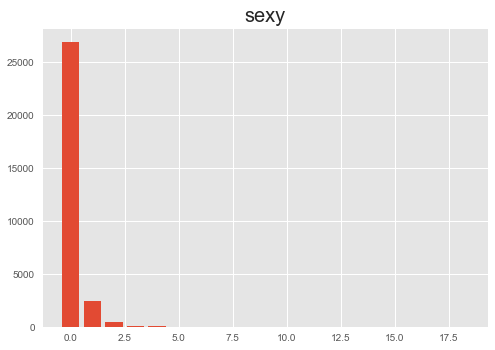

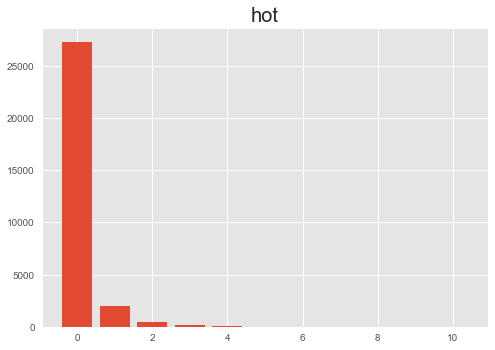

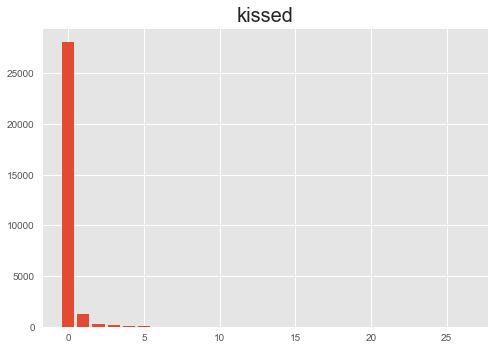

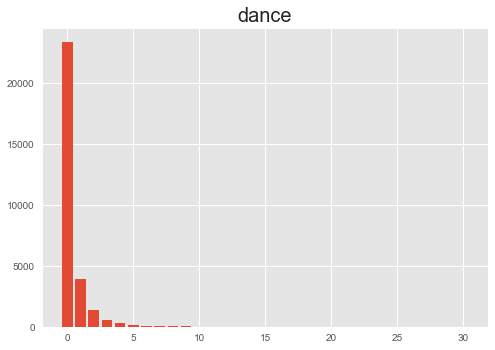

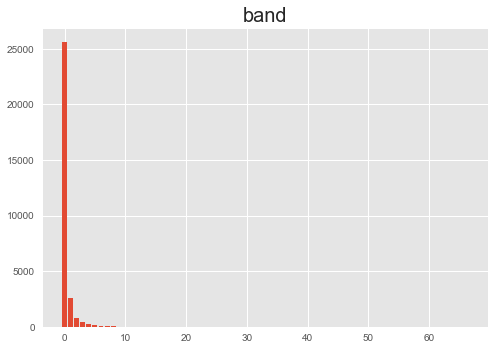

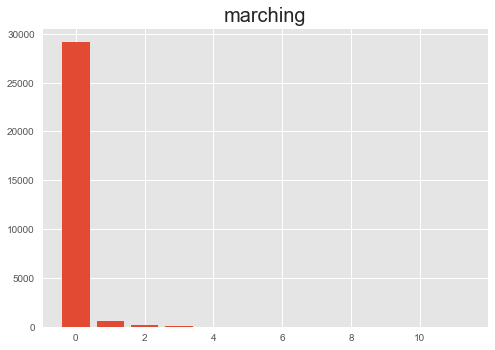

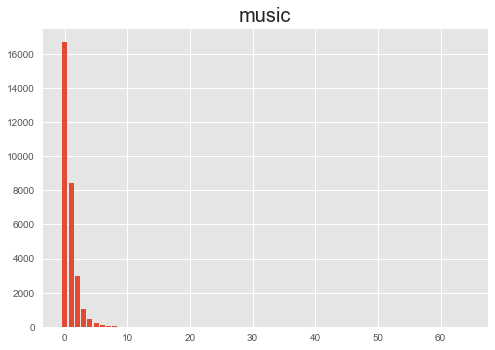

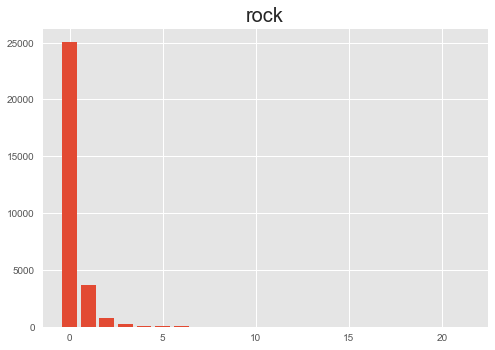

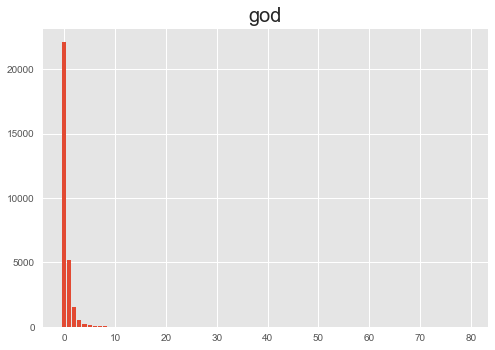

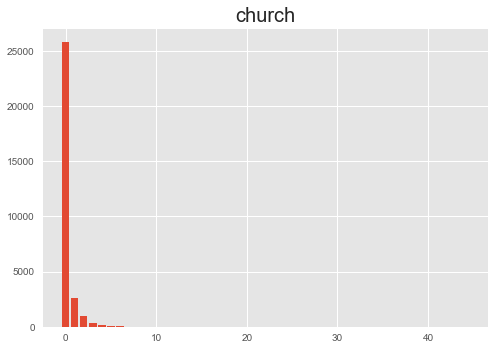

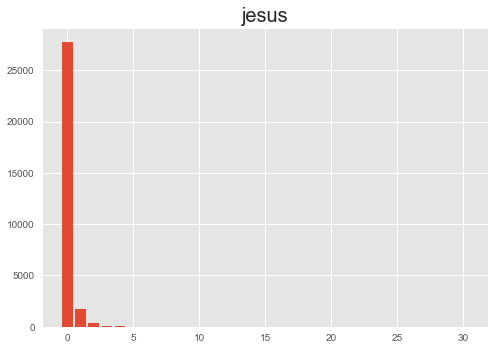

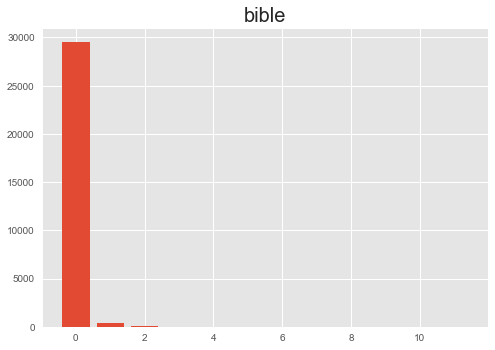

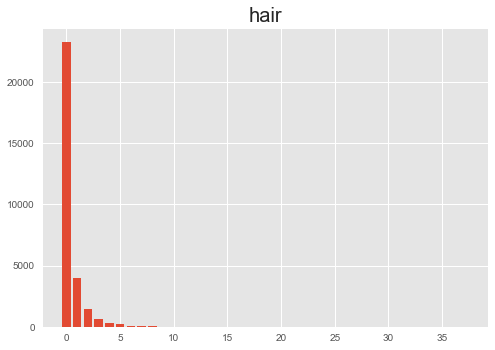

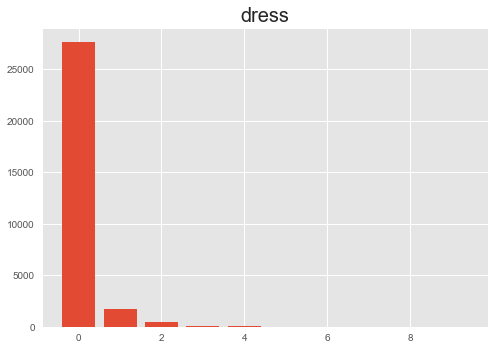

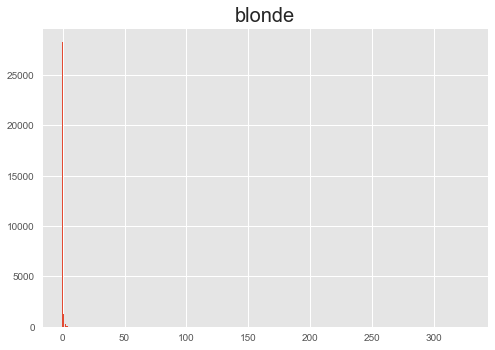

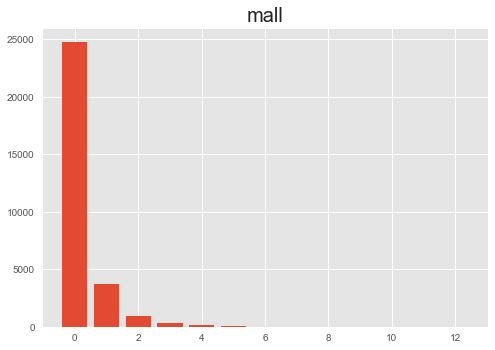

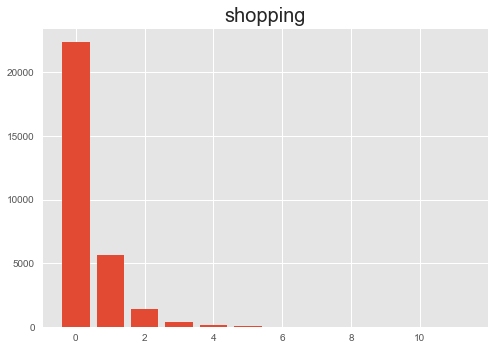

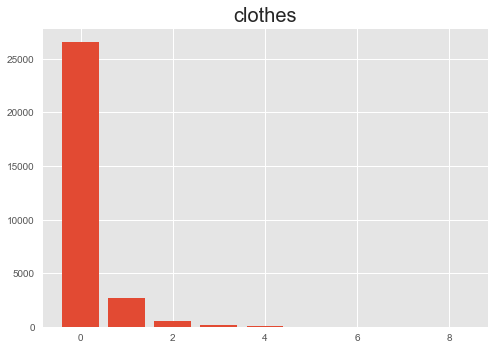

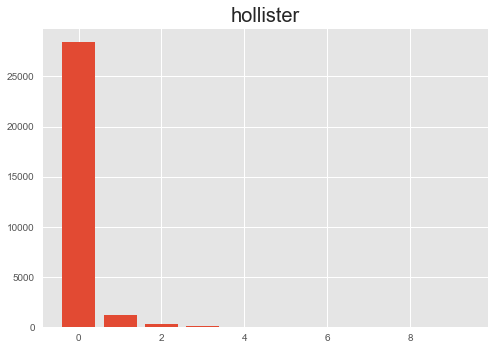

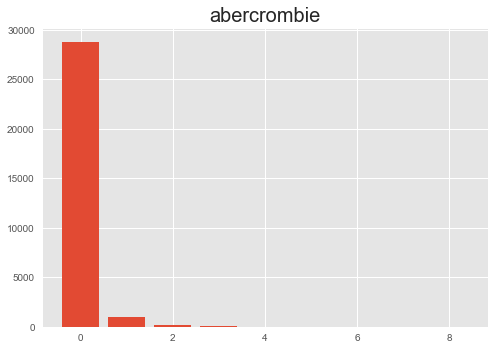

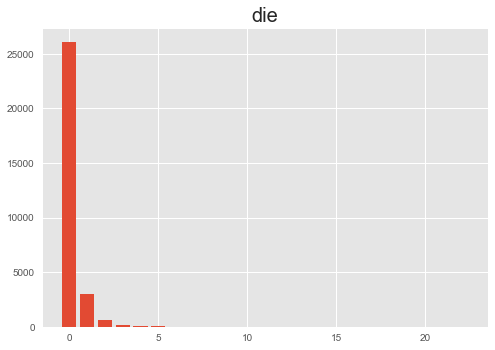

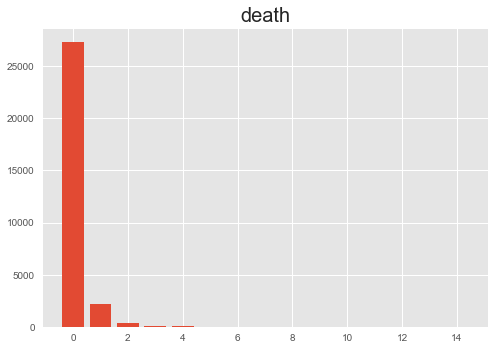

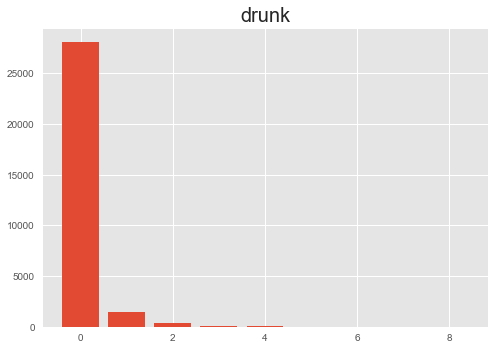

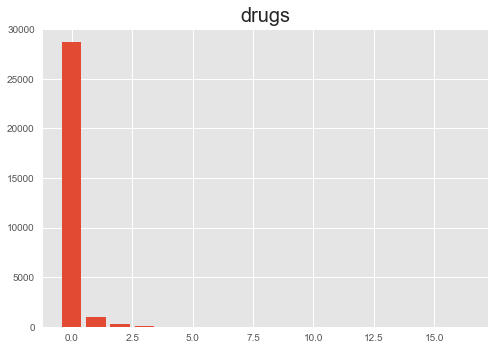

In [11]:
#Your code here:

cols = list(segmentation.columns)

for col in cols:
    if segmentation.dtypes[col] == 'int64' or segmentation.dtypes[col] == 'float64':
        DataFrame = pd.DataFrame(segmentation[col].value_counts()).reset_index().rename(columns={'index': 'value', f'{col}': 'count'})
        plt.bar(DataFrame['value'], DataFrame['count'])
        plt.title(f'{col}', fontsize = 20)
        plt.show()

## 3. Feature Engineering

Based on your previous conclusions, perform transformations in your features. Think about:  
* Category Encoding
* Outliers & Standardization
* Dimension Reduction
* Discard features that are less relevant to group the data

Why did you choose each method? Please explain your rationale.

In [12]:
#Your code here:

segmentation = segmentation.dropna()
segmentation['gender_int'] = segmentation['gender'].apply(lambda x: 0 if x == 'M' else 1)
segmentation = segmentation.drop('gender', axis=1)

In [13]:
cols = list(segmentation.columns)

for col in cols:
    if segmentation.dtypes[col] == 'int64' or segmentation.dtypes[col] == 'float64':
        Q1 = segmentation[col].quantile(q=0.25)
        Q3 = segmentation[col].quantile(q=0.75)
        IQR = Q3 - Q1
        min_outliers = Q1 - 1.5*IQR
        max_outliers = Q3 + 1.5*IQR
        segmentation = segmentation[(segmentation[col] <= max_outliers) & (segmentation[col] >= min_outliers)]

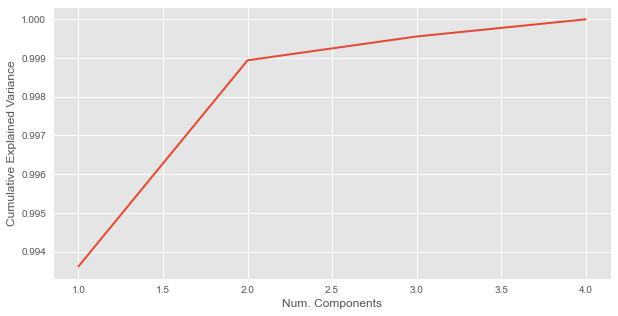

In [14]:
pca = PCA()

sample_data = segmentation.copy()

pca.n_components = 4

pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explained)

plt.figure(1, figsize=(10, 5))
plt.plot(np.arange(1,5), cum_var_explained, linewidth=2)
plt.grid()
plt.xlabel('Num. Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [15]:
pca = PCA(n_components = 2)
segmentation_w_clusters = pd.DataFrame(data=pca.fit_transform(segmentation), columns=['pc_1', 'pc_2'])
segmentation_w_clusters.head(5)

,pc_1,pc_2
0,34.361026,-2.088602
1,-9.638692,-1.698133
2,62.360641,-1.405828
3,-17.638839,-1.911669
4,-6.638447,-1.346030


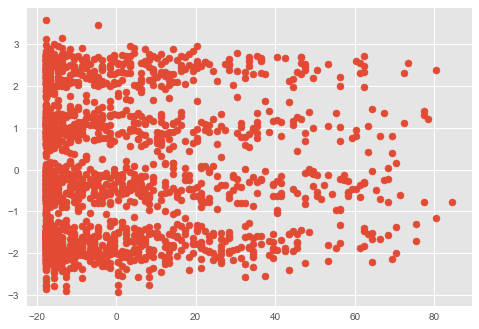

In [16]:
plt.scatter(segmentation_w_clusters['pc_1'], segmentation_w_clusters['pc_2'])

## 4. Modeling

Now that your data is ready, apply one (or more) unsupervised learning model to find the groups of teens that exist:
* What model did you choose?
* What is the optimal number of clusters?
* Once your clusters are defined, how do you interpret them? - What type of teens there are? What are the differences between them?

In [17]:
metrics = ['distortion', 'silhouette', 'calinski_harabasz']

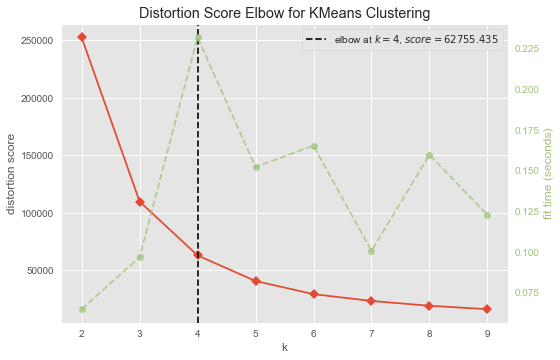

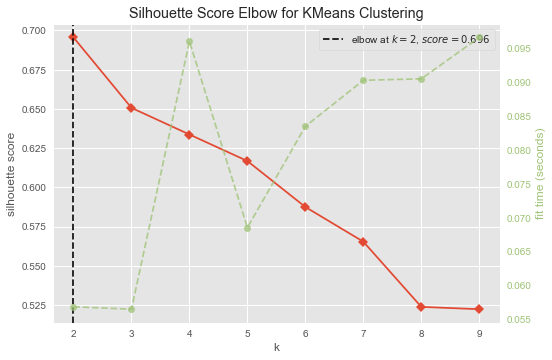

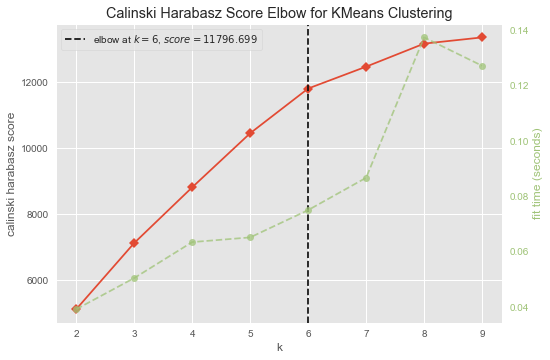

In [18]:
kmeans = KMeans()

for metric in metrics:
    visualizer = KElbowVisualizer(kmeans, k=(2,10), metric=metric)
    visualizer.fit(segmentation_w_clusters)
    visualizer.show()

In [19]:
kmeans = KMeans(n_clusters=4)
segmentation_w_clusters['cluster'] = kmeans.fit_predict(segmentation_w_clusters)
segmentation_w_clusters

,pc_1,pc_2,cluster
0,34.361026,-2.088602,2
1,-9.638692,-1.698133,3
2,62.360641,-1.405828,0
3,-17.638839,-1.911669,3
4,-6.638447,-1.346030,3
...,...,...,...
1904,34.361521,2.290018,2
1905,12.361568,2.349654,1
1906,35.362595,2.726703,2
1907,-17.637588,2.446288,3


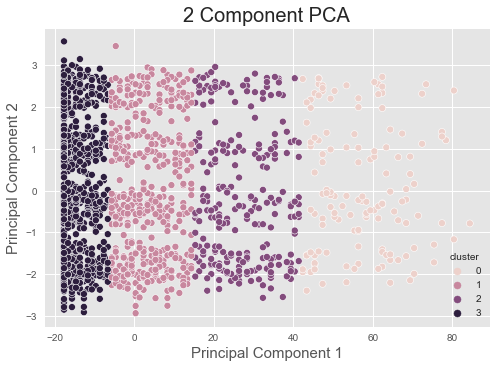

In [20]:
sns.scatterplot(data=segmentation_w_clusters, x='pc_1', y='pc_2', hue='cluster')
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 Component PCA', fontsize = 20)
plt.show()